In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\RANA ASIM\\Pictures\\Data Visualization\\Datasets\\archive (6)\\Bengaluru_House_Data.csv')
df

area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Bedroom  Theanmp       2600   5.0      3.0  120.00  
2          3 BHK      NaN       1440   2.0      3.0   62.00  
3          3 BHK  Soiewre       1521   3.0      1.0   95.00  
4          2 BHK      NaN       1200   2.0      1.0   51.00  
...          ...      ...        ...   ...      ...     ...  
13315  5 Bedroom  ArsiaEx       3453   4.0      0.0  231.00  
13316      4 BHK      NaN       3600   5.0      NaN  400.00  
13317      2 BHK  Mahla T       1141   2.0      1.0   60.00  
13318      4 BHK  SollyCl       4689   4.0      1.0  488.00  
13319      1 BHK      NaN        550   1.0      1.0   17.00  

[13320 rows x 9 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.describe()

bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

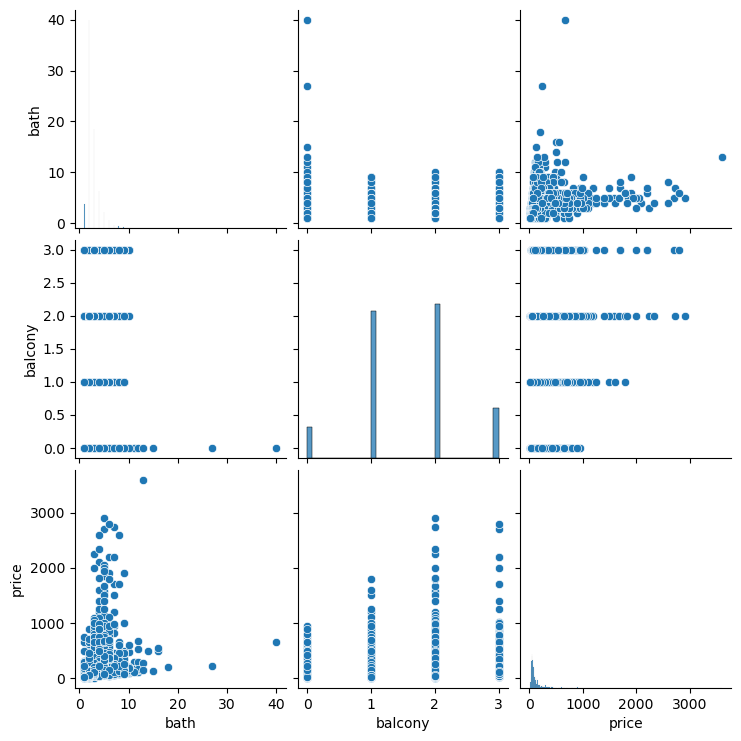

In [5]:
sns.pairplot(df)
#bath and price have slightly linear correlation with some outliers

In [6]:
#Find Unique value

In [7]:
#Value count of each feature
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print('------------------------------')

In [8]:
value_count(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
------------------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
------------------------------
2 

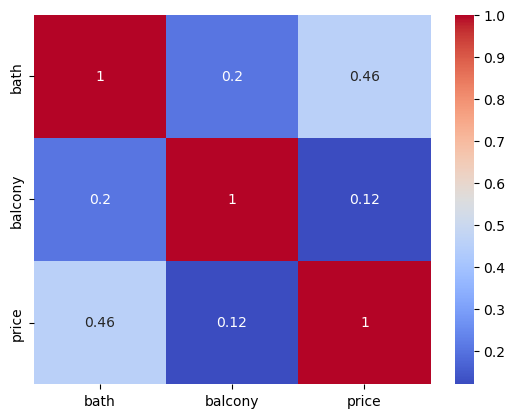

In [9]:
#Correlation Heatmap
num_var=['bath','balcony','price']
sns.heatmap(df[num_var].corr(), cmap='coolwarm',annot=True)
plt.show()
#Correlation of bath is greater then balcony with Price

# Prepare Data For Machine Learning Model

In [10]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
df.isnull().mean()*100 #% of missing data

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

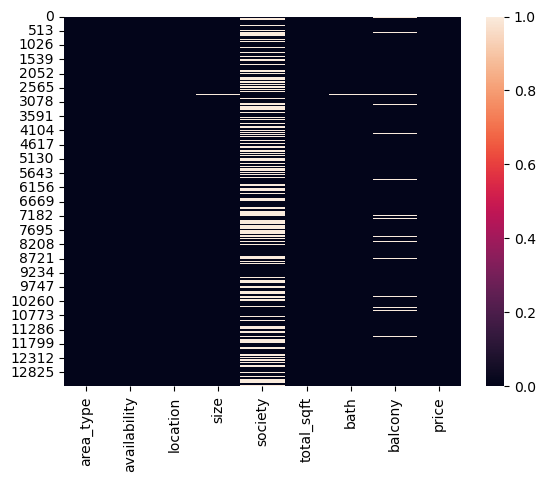

In [12]:
#Visualize Missing data using heatmap
sns.heatmap(df.isnull())
plt.show()

In [13]:
#Drop Society feature as he contains 41.3% missing data
df1=df.drop('society',axis=1)
df1.shape

(13320, 8)

In [14]:
#fill mean value in balcony
df1['balcony']=df1['balcony'].fillna(df1['balcony'].mean())

In [15]:
df1['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [16]:
df1['location']=df1['location'].fillna('Sarjapur  Road')

In [17]:
df1['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [18]:
df1['size']=df1['size'].fillna('2  BHK')

In [19]:
df1['bath']=df1['bath'].fillna(df1['bath'].median())
df1.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [21]:
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00



# Feature Engineering

In [22]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Converting 'total_sqft' cat feature to numeric

In [23]:
#Converting size String  to numeric
df1['bhk']=df1['size'].str.split().str.get(0).astype(int)
df1[df1.bhk>20]   #Which flat has 20 bathrooms which basically outliers of our data

area_type   availability                   location  \
1718  Super built-up  Area  Ready To Move  2Electronic City Phase II   
4684            Plot  Area  Ready To Move                Munnekollal   

            size total_sqft  bath  balcony  price  bhk  
1718      27 BHK       8000  27.0      0.0  230.0   27  
4684  43 Bedroom       2400  40.0      0.0  660.0   43

In [24]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
#dff['total_sqft'].value_counts
#best strategy to convert it into numeric is by splitting

In [26]:
def convertRange(x):
    
    temp=x.split('-')
    if len(temp)==2:
        return ((float(temp[0])+float(temp[1]))/2) #123 - 534 this str value split ||taking mean
    try:
        return float(x)
    except:
        return None  #if value not contain in above format then consider as nan

In [27]:
#apply to column
df1['total_sqft']=df1['total_sqft'].apply(convertRange)

In [28]:
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   total_sqft  bath  balcony   price  bhk  
0      1056.0   2.0      1.0   39.07    2  
1      2600.0   5.0      3.0  120.00    4  
2      1440.0   2.0      3.0   62.00    3  
3      1521.0   3.0      1.0   95.00    3  
4      1200.0   2.0      1.0   51.00    2

In [29]:
#To remove outliers we make another column called price per square fit
df1['price_per_sqft']=df1['price']*100000/df1['total_sqft']
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   total_sqft  bath  balcony   price  bhk  price_per_sqft  
0      1056.0   2.0      1.0   39.07    2     3699.810606  
1      2600.0   5.0      3.0  120.00    4     4615.384615  
2      1440.0   2.0      3.0   62.00    3     4305.555556  
3      1521.0   3.0      1.0   95.00    3     6245.890861  
4      1200.0   2.0      1.0   51.00    2     4250.000000

In [30]:
df1.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft        46
bath               0
balcony            0
price              0
bhk                0
price_per_sqft    46
dtype: int64

In [31]:
df1.describe()

total_sqft          bath       balcony         price           bhk  \
count  13274.000000  13320.000000  13320.000000  13320.000000  13320.000000   
mean    1559.626694      2.688814      1.584376    112.565627      2.802778   
std     1238.405258      1.338754      0.798360    148.971674      1.294496   
min        1.000000      1.000000      0.000000      8.000000      1.000000   
25%     1100.000000      2.000000      1.000000     50.000000      2.000000   
50%     1276.000000      2.000000      2.000000     72.000000      3.000000   
75%     1680.000000      3.000000      2.000000    120.000000      3.000000   
max    52272.000000     40.000000      3.000000   3600.000000     43.000000   

       price_per_sqft  
count    1.327400e+04  
mean     7.907501e+03  
std      1.064296e+05  
min      2.678298e+02  
25%      4.266865e+03  
50%      5.434306e+03  
75%      7.311746e+03  
max      1.200000e+07

In [32]:
#Reducing location
df1['location']=df1['location'].apply(lambda x: x.strip())
location_count=df1['location'].value_counts()

In [33]:
location_count

Whitefield                                            541
Sarjapur  Road                                        400
Electronic City                                       304
Kanakpura Road                                        273
Thanisandra                                           237
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bellandur     

In [34]:
loc_less_10=location_count[location_count<=0]
loc_less_10

Series([], Name: location, dtype: int64)

In [35]:
df1['location']=df1['location'].apply(lambda x: 'other' if x in loc_less_10 else x)

In [36]:
#reset the index || Not add index column in df
df4=df1.reset_index(drop=True)

In [37]:
df4.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   total_sqft  bath  balcony   price  bhk  price_per_sqft  
0      1056.0   2.0      1.0   39.07    2     3699.810606  
1      2600.0   5.0      3.0  120.00    4     4615.384615  
2      1440.0   2.0      3.0   62.00    3     4305.555556  
3      1521.0   3.0      1.0   95.00    3     6245.890861  
4      1200.0   2.0      1.0   51.00    2     4250.000000

In [38]:
df4.drop(['size','availability','area_type'],axis=1,inplace=True)
df4.head()

location  total_sqft  bath  balcony   price  bhk  \
0  Electronic City Phase II      1056.0   2.0      1.0   39.07    2   
1          Chikka Tirupathi      2600.0   5.0      3.0  120.00    4   
2               Uttarahalli      1440.0   2.0      3.0   62.00    3   
3        Lingadheeranahalli      1521.0   3.0      1.0   95.00    3   
4                  Kothanur      1200.0   2.0      1.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13320 non-null  object 
 1   total_sqft      13274 non-null  float64
 2   bath            13320 non-null  float64
 3   balcony         13320 non-null  float64
 4   price           13320 non-null  float64
 5   bhk             13320 non-null  int32  
 6   price_per_sqft  13274 non-null  float64
dtypes: float64(5), int32(1), object(1)
memory usage: 676.5+ KB


In [48]:
null=df4.isnull().sum()
null

location           0
total_sqft        46
bath               0
balcony            0
price              0
bhk                0
price_per_sqft    46
dtype: int64

In [52]:
from sklearn.impute import SimpleImputer
num_var=df4.select_dtypes(include=['int64','float64']).columns
num_var_miss=[var for var in num_var if null[var]>0]
si=  SimpleImputer(strategy='mean')
df4[num_var_miss]=si.fit_transform(df4[num_var_miss])

In [53]:
df4[num_var_miss].isnull().sum()

total_sqft        0
price_per_sqft    0
dtype: int64

In [55]:
df4.isnull().sum()

location          0
total_sqft        0
bath              0
balcony           0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df4['location'])

array([ 405,  303, 1166, ...,  959,  894,  382])

In [59]:
df4['location_le']=le.fit_transform(df4['location'])
df4

location    total_sqft  bath  \
0                               Electronic City Phase II   1056.000000   2.0   
1                                       Chikka Tirupathi   2600.000000   5.0   
2                                            Uttarahalli   1440.000000   2.0   
3                                     Lingadheeranahalli   1521.000000   3.0   
4                                               Kothanur   1200.000000   2.0   
5                                             Whitefield   1170.000000   2.0   
6                                       Old Airport Road   2732.000000   4.0   
7                                           Rajaji Nagar   3300.000000   4.0   
8                                           Marathahalli   1310.000000   3.0   
9                                           Gandhi Bazar   1020.000000   6.0   
10                                            Whitefield   1800.000000   2.0   
11                                            Whitefield   2785.000000   5.0   
12                                    7th Phase JP Nagar   1000.000000   2.0   
13                                             Gottigere   1100.000000   2.0   
14                                              Sarjapur   2250.000000   3.0   
15                                           Mysore Road   1175.000000   2.0   
16                                         Bisuvanahalli   1180.000000   3.0   
17                                 Raja Rajeshwari Nagar   1540.000000   3.0   
18                                 Ramakrishnappa Layout   2770.000000   4.0   
19                                    Manayata Tech Park   1100.000000   2.0   
20                                               Kengeri    600.000000   1.0   
21                                            Binny Pete   1755.000000   3.0   
22                                           Thanisandra   2800.000000   5.0   
23                                             Bellandur   1767.000000   3.0   
24                                           Thanisandra    510.000000   1.0   
25                                       Mangammanapalya   1250.000000   3.0   
26                                       Electronic City    660.000000   1.0   
27                                            Whitefield   1610.000000   3.0   
28                                      Ramagondanahalli   1151.000000   2.0   
29                                       Electronic City   1025.000000   2.0   
30                                             Yelahanka   2475.000000   4.0   
31                                         Bisuvanahalli   1075.000000   2.0   
32                                                Hebbal   1760.000000   2.0   
33                                 Raja Rajeshwari Nagar   1693.000000   3.0   
34                                         Kasturi Nagar   1925.000000   3.0   
35                                        Kanakpura Road    700.000000   2.0   
36                              Electronics City Phase 1   1070.000000   2.0   
37                                          Kundalahalli   1724.000000   3.0   
38                                        Chikkalasandra   1290.000000   2.0   
39                                           Uttarahalli   1143.000000   2.0   
40                                         Murugeshpalya   1296.000000   2.0   
41                                        Sarjapur  Road   1254.000000   3.0   
42                                           Ganga Nagar    600.000000   1.0   
43                                             Yelahanka    660.000000   1.0   
44                                        Kanakpura Road   1330.740000   2.0   
45                                            HSR Layout    600.000000   9.0   
46                                          Doddathoguru    970.000000   2.0   
47                                            Whitefield   1459.000000   2.0   
48                                              KR Puram    800.000000   1.0   
49                                      Himagiri

In [64]:
df4.drop('location',axis=1,inplace=True)

In [66]:
X=df4.drop('price',axis=1)
y=df4['price']
print(X.shape)
print(y.shape)

(13320, 6)
(13320,)


In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=52)
print('sahpe of X_train',X_train.shape)
print('sahpe of y_train',y_train.shape)
print('sahpe of X_test',X_test.shape)
print('sahpe of y_test',y_test.shape)

sahpe of X_train (10656, 6)
sahpe of y_train (10656,)
sahpe of X_test (2664, 6)
sahpe of y_test (2664,)


In [102]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

# SVR

In [103]:
from sklearn.svm import SVR
svr_rbf=SVR( kernel='rbf')
svr_rbf.fit(X_train,y_train)
svr_rbf.score(X_test,y_test)

0.2615837219303644

In [104]:
svr_linear=SVR( kernel='linear')
svr_linear.fit(X_train,y_train)
svr_linear.score(X_test,y_test)


0.5604275974111614

In [105]:
svr_poly=SVR( kernel='poly',degree=2)
svr_poly.fit(X_train,y_train)
svr_poly.score(X_test,y_test)

-0.10968492046821732

# Decision Tree Regression

In [106]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)

0.9325198733328193

# Random Forest Regression

In [107]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100, criterion='squared_error')
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.9307262697585365

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr1=RandomForestRegressor(n_estimators=100, criterion='absolute_error')
rfr1.fit(X_train,y_train)
rfr1.score(X_test,y_test)

# Poly Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly= poly_reg.transform(X_train)
X_test_poly= poly_reg.transform(X_test)


In [ ]:
lr1=LinearRegression()
lr1.fit(X_train_poly,y_train)
lr1.score(X_test_poly,y_test)

ValueError: x and y must be the same size

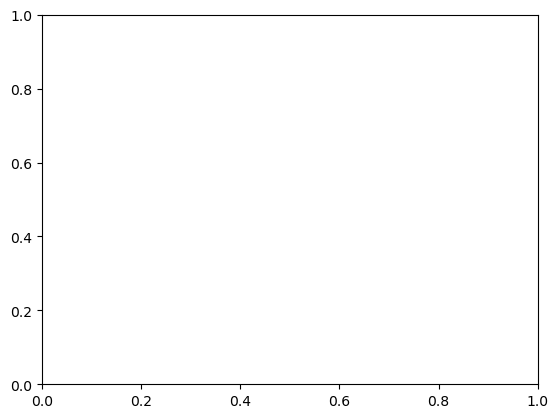

In [99]:
plt.scatter(X_train,y_train)

ValueError: x and y must be the same size

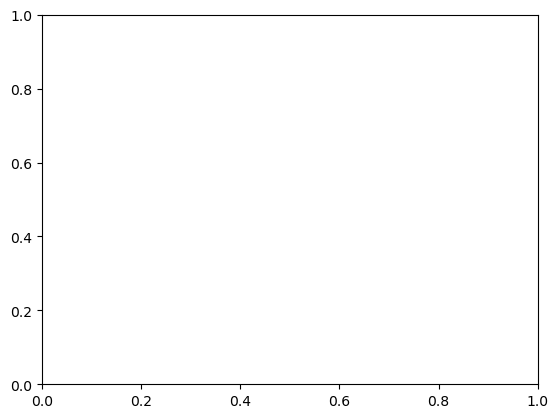

In [100]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr1.predict(X_train),color='r')